# Milestone 2 - Selection of dataset(s), exploratory data analysis

**Authors:**
- Julia Lorenz
- Maciej Janicki 
- Jakub Kubiak

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from collections import Counter
import nltk
from nltk.corpus import stopwords


## 1. Datasets

### 1.1. Dataset 1 - Tweets Misinformation Correction Dataset
The dataset is derived from the MUSE model’s GitHub repository (https://github.com/Social-Futures-Lab/MUSE/tree/main) and is used to evaluate the generated responses. It includes the text of the original tweet (`post_text`), the generated corrective response (`response_text`), and the source of the response (`response_type`). The response source can be one of four categories: produced by highly helpful humans (**human_high**), produced by humans with average helpfulness (**human_avg**), generated by the **GPT-4** model, or generated by the **MUSE** model.


In [3]:
tweets_data = pd.read_csv('data/tweets_correction/posts.csv')
tweets_data.head()

,created_at,updated_at,post_id,post_tweet_id,post_text,response_text,response_type,annotated
0,2024-09-04 22:15:43.442084+00:00,2025-01-20 19:43:12.233681+00:00,1978,1625153911525937157,"While we’re distracted by pronouns, UFOs, & Wo...","This event is unfolding in East Palestine, a t...",human-high,Y
1,2024-09-04 22:15:43.616911+00:00,2024-10-15 17:53:25.931428+00:00,1979,1625153911525937157,"While we’re distracted by pronouns, UFOs, & Wo...",The note is needed. It’s not critiquing the po...,human-avg,Y
2,2024-09-04 22:15:43.725593+00:00,2025-01-20 19:12:03.672783+00:00,1980,1625153911525937157,"While we’re distracted by pronouns, UFOs, & Wo...",This tweet is misleading. While there was inde...,muse,Y
3,2024-09-04 22:15:43.835628+00:00,2024-10-15 18:30:32.968247+00:00,1981,1625153911525937157,"While we’re distracted by pronouns, UFOs, & Wo...",This tweet is misleading. There's no record of...,gpt-4,Y
4,2024-09-04 22:15:43.949458+00:00,2025-01-20 19:59:57.100156+00:00,1982,1624961860498776069,This is extremely fucking concerning to anyone...,The map is of the Ohio River Basin and does no...,human-high,Y


In [4]:
unique_tweets = tweets_data.groupby('post_tweet_id').size().shape[0]
print(f'Number of unique tweets in the dataset: {unique_tweets}')

number_of_responses = tweets_data.shape[0]
print(f'Total number of responses in the dataset: {number_of_responses}')

response_type_counts = tweets_data['response_type'].value_counts()
print(f'Number of responses by type - {response_type_counts}')


Number of unique tweets in the dataset: 247
Total number of responses in the dataset: 988
Number of responses by type - response_type
human-high    247
human-avg     247
muse          247
gpt-4         247
Name: count, dtype: int64


The dataset contains a total of **247 unique tweets**, with each tweet receiving four corresponding responses, one from each of the four response types. This results in **988 entries** in total.


### 1.2. Dataset 2 - Fake News Detection in Articles 

https://www.kaggle.com/datasets/mdepak/fakenewsnet?select=BuzzFeed_fake_news_content.csv

This dataset compiles articles from multiple news sources, including both genuine and fake content. For the purpose of this task, our focus will be on the subset of articles identified as fake news from the BuzzFeed website. Each record in the dataset includes the `title` of the article and the corresponding main `text`.

In [5]:
fake_news_data = pd.read_csv('data/fake_news/BuzzFeed_fake_news_content.csv')
fake_news_data.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."
3,Fake_12-Webpage,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",http://www.addictinginfo.org/2016/09/19/trumps...,http://addictinginfo.addictinginfoent.netdna-c...,John Prager,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://2.gravat...",http://addictinginfo.com/2016/09/19/trumps-lat...,"{""publisher"": ""Addicting Info | The Knowledge ..."
4,Fake_13-Webpage,Website is Down For Maintenance,Website is Down For Maintenance,http://www.proudcons.com/clinton-foundation-ca...,NaN,NaN,http://www.proudcons.com,NaN,NaN,NaN,NaN,"{""og"": {""url"": ""http://www.proudcons.com"", ""ty..."


In [6]:
number_of_articles = fake_news_data.shape[0]
print(f'Total number of articles in the fake news dataset: {number_of_articles}')

Total number of articles in the fake news dataset: 91


### 1.3. Dataset 3 - Fact-checked Online Content 

https://www.kaggle.com/datasets/mattimansha/verified-posts-fact-checking-online-content

This dataset contains fact-checked posts from various online platforms, covering a wide range of topics between 2008 and 2022. Each entry includes the post’s `title`, content of the post - `post`, a truthfulness rating `status`, and a link to the original content. 

In [7]:
posts_data = pd.read_csv('data/online_posts/Politifact_data.csv')
posts_data.head()

,Title,StartDate,Link,Post,Status
0,Instagram posts,"February 20, 2023",https://www.politifact.com/factchecks/2023/feb...,Because the Covid shots are still manufactured...,false
1,Viral image,"February 21, 2023",https://www.politifact.com/factchecks/2023/feb...,Leaked audio recording of Biden and Zelenskyy ...,false
2,Viral image,"February 20, 2023",https://www.politifact.com/factchecks/2023/feb...,A photo shows President Joe Biden and Ukrainia...,false
3,Facebook posts,"February 20, 2023",https://www.politifact.com/factchecks/2023/feb...,The U.S. State Department has started a specia...,false
4,George Santos,"February 20, 2023",https://www.politifact.com/factchecks/2023/feb...,I never claimed to be Jewish.,pants-fire


In [13]:
number_of_posts = posts_data.shape[0]
print(f'Total number of posts in the online posts dataset: {number_of_posts}')

Total number of posts in the online posts dataset: 22020


## 2. Exploratory Data Analysis - Dataset 1

### 2.1. Example Tweets and Responses



In [8]:
def display_example(tweet_index):
    tweet_id = tweets_data['post_tweet_id'].iloc[tweet_index]

    tweet_group = tweets_data[tweets_data['post_tweet_id'] == tweet_id]
    tweet_text = tweet_group['post_text'].iloc[0]
    display(Markdown(f"### Original Tweet\n> {tweet_text}\n"))
    for _, row in tweet_group.iterrows():
        display(Markdown(
            f"**Response Type:** `{row['response_type']}`  \n"
            f"**Response Text:** {row['response_text']}\n"
        ))

In [9]:
display_example(13)

### Original Tweet
> This is authoritarianism. Full stop.


**Response Type:** `human-high`  
**Response Text:** This screenshot is of an AP article which is fact-checking the claim outlined in the shown headline. The AP assessed the claim as false.
https://apnews.com/article/fact-check-desantis-florida-sports-female-athletes-160560972802


**Response Type:** `human-avg`  
**Response Text:** The tweet calls the move to monitor the health of female athletes "authoritarian." In fact, a citizen committee of experts who want to protect the health of women in sports is the opposite of authoritarian. See the AP fact check.
https://apnews.com/article/fact-check-desantis-florida-sports-female-athletes-160560972802


**Response Type:** `muse`  
**Response Text:** This tweet is potentially misleading. The proposed mandate in Florida regarding menstrual cycle details for female athletes is not a decision made by the governor's office, but by the Florida High School Athletic Association, a private nonprofit organization. The recommendation is also consistent with national guidelines for sports physicals. No final decision has been made yet. For more accurate information, please refer to this article: https://apnews.com/article/fact-check-desantis-florida-sports-female-athletes-160560972802 


**Response Type:** `gpt-4`  
**Response Text:** This tweet is vague without context. It's hard to determine if it's misinformed or misleading without knowing what specific event or action Nina Turner is referring to as "authoritarianism". Please provide more details for a proper assessment.


In [10]:
display_example(777)

### Original Tweet
> Boston University researchers have reportedly claimed to have developed new, more lethal COVID strain in lab that has an 80% kill rate in a non-peer reviewed paper, per NYP.


**Response Type:** `human-high`  
**Response Text:** This is from a FoxNews headline which is incorrect.  They did NOT create a more lethal strain, the combined the original strain with the newer spike protein and found it was 20% LESS lethal. https://www.bostonherald.com/2022/10/17/boston-university-covid-researchers-combine-omicron-spike-protein-with-original-virus-test-strain-on-mice/


**Response Type:** `human-avg`  
**Response Text:** This tweet misconstrued the information given in a Boston Herald article. They are presenting non-peer reviewed trials as fact. https://www.bostonherald.com/2022/10/17/boston-university-covid-researchers-combine-omicron-spike-protein-with-original-virus-test-strain-on-mice/


**Response Type:** `muse`  
**Response Text:** This tweet is accurate but potentially misleading. While Boston University researchers did develop a new COVID strain with an 80% kill rate, it's important to note that this was observed in mice, not humans. The strain is a combination of Omicron and the original virus from Wuhan. The research was indeed not peer-reviewed at the time of the tweet. However, the tweet could lead to unnecessary panic as it doesn't clarify that the high mortality rate was observed in a lab setting and in mice, not in humans.
https://www.fox13news.com/news/boston-university-researchers-claim-to-have-developed-new-more-lethal-covid-strain-in-lab


**Response Type:** `gpt-4`  
**Response Text:** This tweet is misleading. Boston University has not reported the development of a more lethal COVID strain in a lab. The New York Post (NYP) article referenced does not exist. Misinformation like this can cause unnecessary panic. Always verify information from reliable sources like the World Health Organization (WHO) or Centers for Disease Control and Prevention (CDC).
- WHO: https://www.who.int/
- CDC: https://www.cdc.gov/


### 2.2. Lengths of Tweets and Responses

We can observe clear discrepancies between the lengths of the tweets and the generated responses. On average, tweets themselves are relatively short, with a mean length of around **164 characters**, while all response types are considerably longer. The **human-written** responses tend to be shorter, with those deemed highly helpful averaging around **325 characters** and those with average helpfulness being approximately **275 characters** long. In contrast, the generated responses are much longer, which may indicate more detailed content. **MUSE** produces the longest outputs, averaging around **700 characters**, followed by **GPT-4** at approximately **522 characters**. This suggests that model-generated responses tend to be more elaborate, suggesting a trade-off between **conciseness** and **informativeness**.

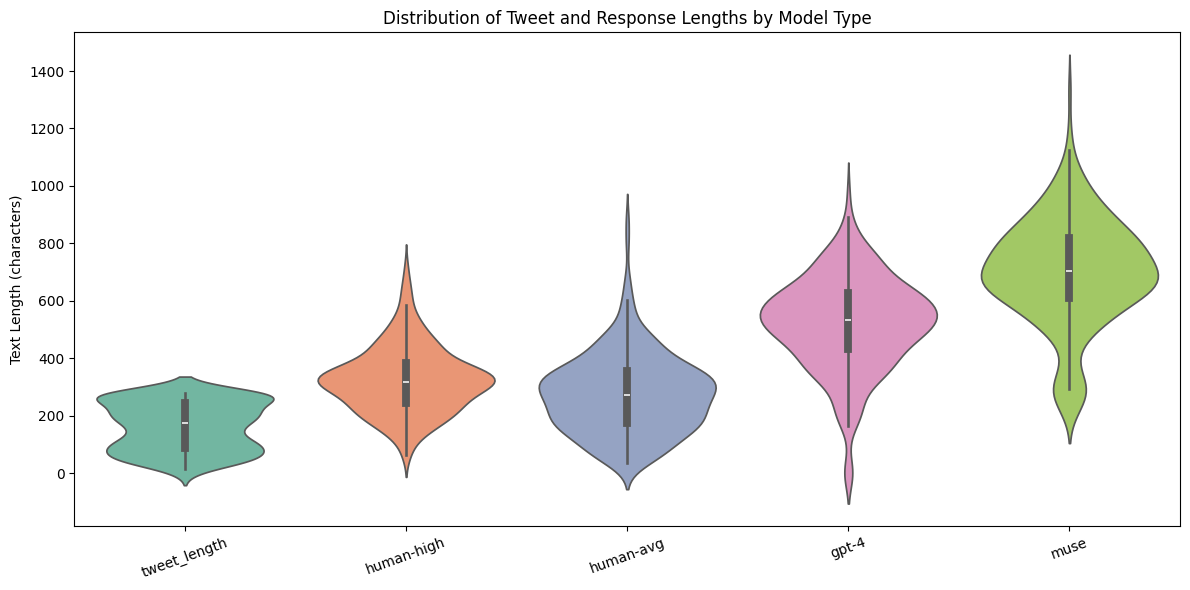


Summary of Tweet and Response Lengths:

        Type  count       mean  median        std   min    max
        muse    247 700.510121   703.0 186.035530 228.0 1333.0
       gpt-4    247 522.356275   534.0 161.180259   1.0  974.0
  human-high    247 324.789474   318.0 114.728011  63.0  720.0
   human-avg    247 275.052632   273.0 136.942162  35.0  881.0
tweet_length    247 164.121457   173.0  84.354661  14.0  280.0


In [11]:
tweets_data['tweet_length'] = tweets_data['post_text'].str.len()
tweets_data['response_length'] = tweets_data['response_text'].str.len()

pivot_df = tweets_data.pivot_table(
    index='post_tweet_id',
    columns='response_type',
    values='response_length'
).reset_index()

tweet_len_df = tweets_data[['post_tweet_id', 'tweet_length']].drop_duplicates()
pivot_df = pivot_df.merge(tweet_len_df, on='post_tweet_id')

melted = pivot_df.melt(
    value_vars=['tweet_length', 'human-high', 'human-avg', 'gpt-4', 'muse'],
    var_name='Type',
    value_name='Length'
)

plt.figure(figsize=(12, 6))
sns.violinplot(data=melted, x='Type', y='Length', hue='Type', palette='Set2', legend=False, inner='box')

plt.title('Distribution of Tweet and Response Lengths by Model Type')
plt.xlabel('')
plt.ylabel('Text Length (characters)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

summary_table = (
    melted.groupby('Type')['Length']
    .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
)

print("\nSummary of Tweet and Response Lengths:\n")
print(summary_table.to_string(index=False))

## 3. Exploratory Data Analysis - Dataset 2

### 3.1. Title and Text Legnths

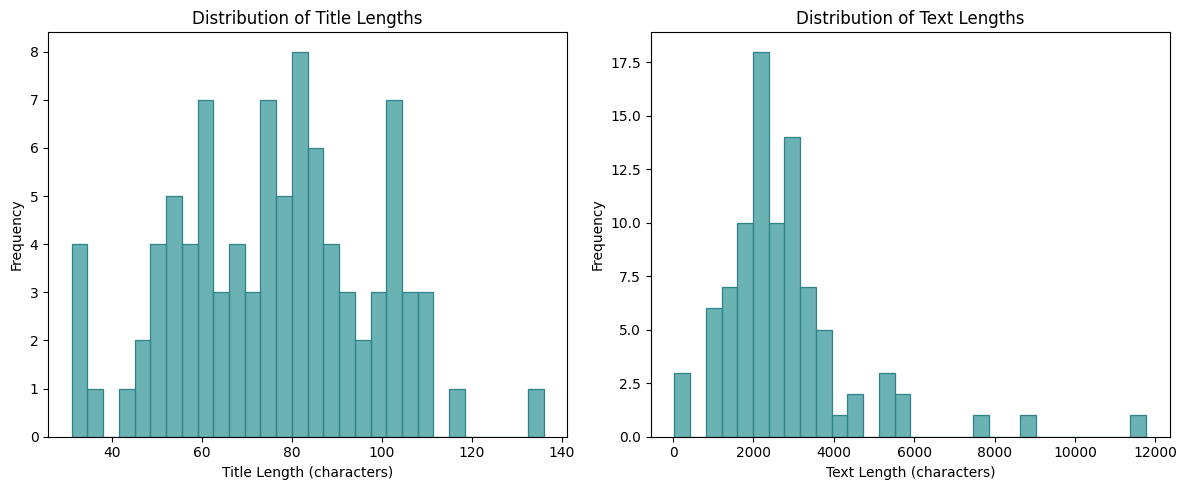

In [36]:
fake_news_data['title_length'] = fake_news_data['title'].str.len()
fake_news_data['text_length'] = fake_news_data['text'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(fake_news_data['title_length'], bins=30, ax=axes[0], color='#3a989c', edgecolor='#308488')
axes[0].set_title('Distribution of Title Lengths', fontsize=12)
axes[0].set_xlabel('Title Length (characters)')
axes[0].set_ylabel('Frequency')

sns.histplot(fake_news_data['text_length'], bins=30, ax=axes[1], color='#3a989c', edgecolor='#308488')
axes[1].set_title('Distribution of Text Lengths', fontsize=12)
axes[1].set_xlabel('Text Length (characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3.2. Most Common Words in Headlines

The analysis of the most common words in the fake news titles reveals a strong political focus, with terms such as *Hillary*, *Clinton*, *Trump*, and *Obama* dominating the list. This suggests that much of the fake content in this dataset revolves around US political figures and events. Words like *freedom*, *daily*, *eagle*, and *rising* also appear frequently, likely reflecting the names of partisan websites or emotionally charged language often used to appeal to readers’ patriotism or ideology. 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julci\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


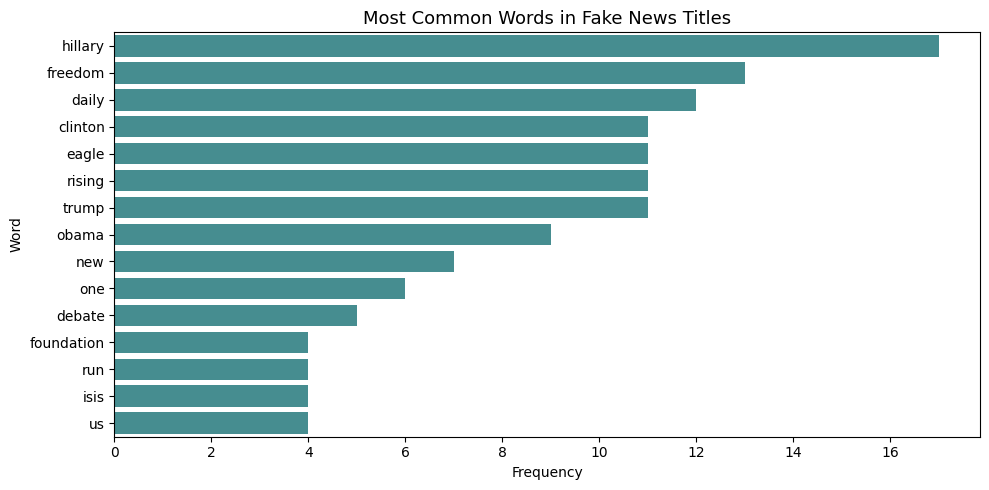

In [30]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = fake_news_data['title'].str.lower().str.cat(sep=' ')
words = [word for word in all_words.split() if word.isalpha() and word not in stop_words]

common_words = Counter(words).most_common(15)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=[w[1] for w in common_words],
    y=[w[0] for w in common_words],
    color='#3a989c'
)
plt.title('Most Common Words in Fake News Titles', fontsize=13)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


### 3.3. Top Sources

Based on the URLs of the top sources, it can be observed that most originate from politically oriented websites, primarily focused on US politics. Several of these sources appear to have a right-leaning agenda. Overall, the distribution suggests that much of the fake news content in this dataset is produced by politically motivated platforms posing as news websites.

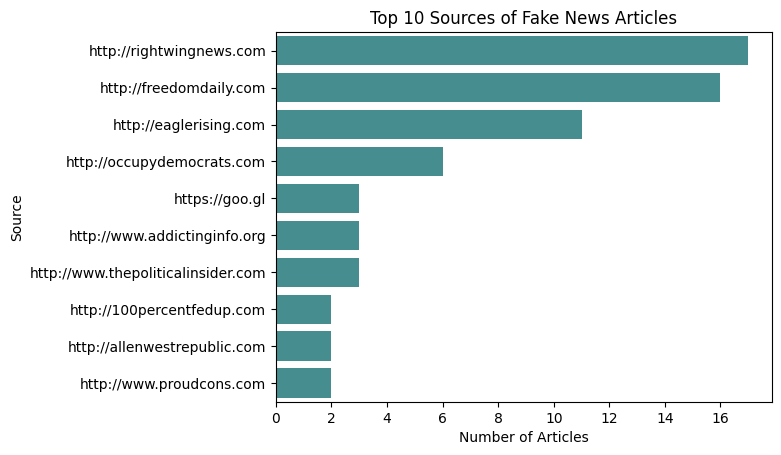

In [32]:
top_sources = fake_news_data['source'].value_counts().head(10)
sns.barplot(y=top_sources.index, x=top_sources.values, color='#3a989c')
plt.title('Top 10 Sources of Fake News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()


## 4. Exploratory Data Analysis - Dataset 3

### 4.1. Posts Lengths

count    22020.000000
mean       106.366031
std         46.345594
min         11.000000
25%         73.000000
50%         97.000000
75%        132.000000
max        446.000000
Name: post_length, dtype: float64


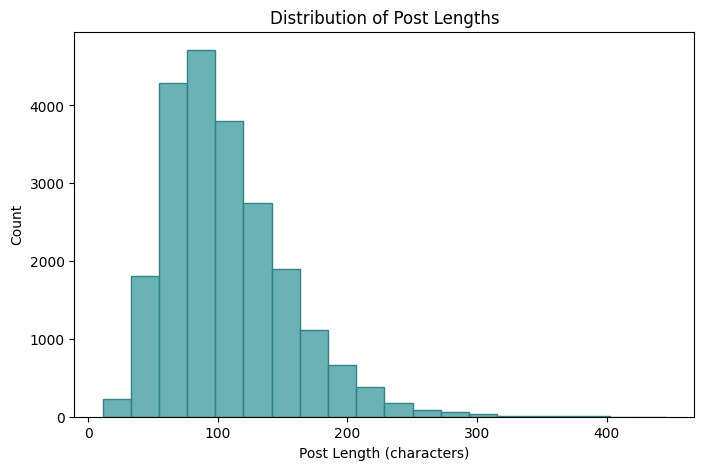

In [ ]:
posts_data['post_length'] = posts_data['Post'].apply(len)

print(posts_data['post_length'].describe())

plt.figure(figsize=(8,5))
sns.histplot(posts_data['post_length'], bins=20, color='#3a989c', edgecolor='#308488')
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length (characters)')
plt.ylabel('Count')
plt.show()


### 4.2. Posts Labels - Truthfulness

We can see that most of the posts in this dataset contain some level of falseness, with the biggest class being 'false'.

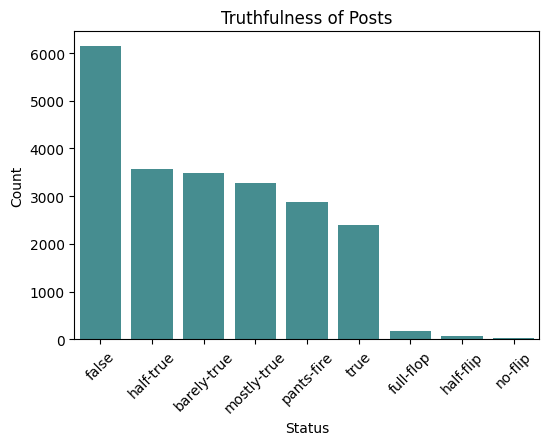

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=posts_data, x='Status', order=posts_data['Status'].value_counts().index, color='#3a989c')
plt.title('Truthfulness of Posts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 4.3. Post Sources

The most common source of content in this dataset are **Facebook posts**, there are also many entries that come from several **politicians** such as Donald Teump, Barack Obama, Joe Biden or Hillary Clinton. Big portion of the posts come from **viral images** and **instagram posts**.

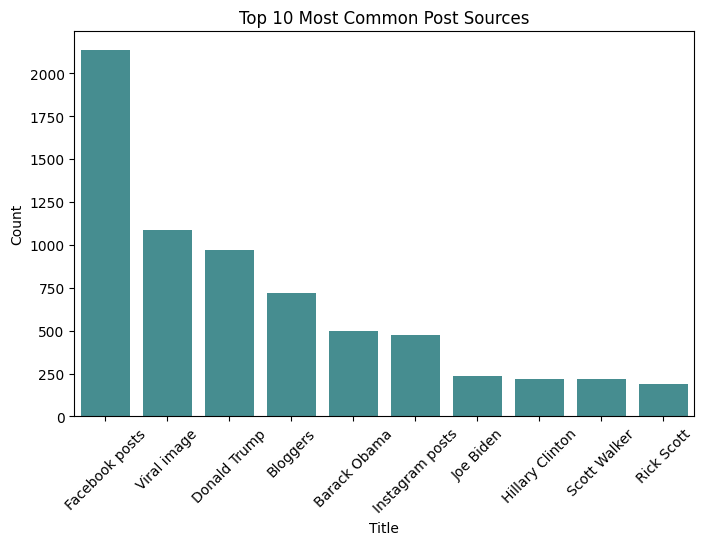

In [46]:
plt.figure(figsize=(8,5))
top_titles = posts_data['Title'].value_counts().head(10).index
sns.countplot(data=posts_data, x='Title', order=top_titles, color='#3a989c')
plt.title('Top 10 Most Common Post Sources')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
